In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2018-11-21 16:42:20,843 [24184] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [7]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--batch-size', '--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel', '--stacked-kernel', '--sumed-kernel', '--svhn',
       '--tensorboard', '--validation-size',
       'deepfriedconvnet', 'deepstrom','dense', "--gamma", "--nb-stack", 
                     "--non-linear", "--non-linearity", "--num-epoch", "--seed",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-fastfood", "--real-nystrom"
            ]
    for c in col_to_delete:
        try:
            df = df.drop([c], axis=1)
        except KeyError as e:
            print("pass", e)

    return df

In [8]:
DIRNAME = "/home/luc/Resultats/Deepstrom/november_2018/end_to_end_with_augment"
FILENAME = "gathered_results.csv"
df_no_conv_hand = build_df(DIRNAME, FILENAME)

In [9]:
DIRNAME = "/home/luc/Resultats/Deepstrom/november_2018/end_to_end_subsample_conv_hand_with_augment"
FILENAME = "gathered_results.csv"
df_conv_hand = build_df(DIRNAME, FILENAME)

pass "['deepfriedconvnet'] not found in axis"
pass "['dense'] not found in axis"
pass "['--nb-stack'] not found in axis"
pass "['--second-layer-size'] not found in axis"
pass "['--real-fastfood'] not found in axis"


In [15]:
display(df_no_conv_hand)

--nys-size --out-dim  dataset    kernel           network            test_acc        test_eval_time       training_time             val_acc        val_eval_time  file_timestamp
0        None        64     svhn      None             dense  0.9458981443334509     10.34985876083374  114540.45786070824  0.9479000031948089    6.307359933853149      1542112063
1        None       128     svhn      None             dense  0.9500648246871101     9.564645528793335  118978.64107084274  0.9454999923706054    5.882847309112549      1542112081
2        None      None     svhn      None  deepfriedconvnet                None                  None                None                None                 None      1542128113
3        None        16  cifar10      None             dense  0.8750999987125396     3.556856632232666    51417.4389526844  0.8725000023841858    5.722635269165039      1542093242
4        None      None  cifar10      None  deepfriedconvnet                None                  None                None                None                 None      1542128044
5        None      None    mnist      None  deepfriedconvnet                None                  None                None                None                 None      1542128021
6        None      None    mnist      None  deepfriedconvnet                None                  None                None                None                 None      1542128036
7        None      1024     svhn      None             dense  0.9470370301493892    10.098342180252075  119093.35198688507  0.9433000087738037   6.1705663204193115      1542112171
8           4      None  cifar10  chi2_cpd         deepstrom  0.8697000086307526    3.9117791652679443   56443.23889231682  0.8759000062942505    6.313701391220093      1542144666
9           4      None    mnist  chi2_cpd         deepstrom  0.7988000035285949   0.05095171928405762  10202.119398117065  0.8037999987602233  0.09100127220153809      1542128137
10          8      None  cifar10  chi2_cpd         deepstrom  0.8703999996185303    3.6414413452148438   57386.47595191002  0.8709000051021576    5.832661390304565      1542144697
11       None        16    mnist      None             dense  0.9584999918937683   0.07531499862670898  18834.147827863693  0.9583999991416932  0.07740616798400879      1542093237
12         16      None    mnist  chi2_cpd         deepstrom  0.8655000030994415  0.060543060302734375    10251.9246032238  0.8617999970912933   0.1010580062866211      1542138349
13          4      None     svhn  chi2_cpd         deepstrom  0.9449722214981362     3.056546449661255  157415.13459396362   0.941399997472763    1.819403886795044      1542168358
14       None        64  cifar10      None             dense  0.8715999960899353      3.90252685546875   51397.38422727585  0.8755999982357026    6.284409046173096      1542093242
15        128      None     svhn  chi2_cpd         deepstrom  0.9461481416666949       3.6263587474823   83843.22896647453  0.9402000069618225   2.0779218673706055      1542183046
16         16      None     svhn  chi2_cpd         deepstrom  0.9448888897895813    3.1488840579986572  161223.36014437675  0.9398000001907348    1.856621503829956      1542173177
17        128      None  cifar10  chi2_cpd         deepstrom  0.8719999969005585     4.408368825912476   55802.59868788719  0.8729000091552734    6.515403985977173      1542149279
18       None      1024  cifar10      None             dense  0.8707000076770782     3.899188756942749   34750.86156606674  0.8687999963760376    6.288317680358887      1542093242
19       None       128    mnist      None             dense  0.9712999999523163   0.04774975776672363  18801.122860193253  0.9713999986648559  0.09031915664672852      1542093242
20       None      None  cifar10      None  deepfriedconvnet                None                  None                None                None                 None      1542128054
21        256      None     svhn  chi2_cpd 

In [16]:
display(df_conv_hand)

--nys-size --out-dim  --subs-every  dataset    kernel  test_acc  test_eval_time  training_time  val_acc  val_eval_time  file_timestamp
0           64      None            50    mnist  chi2_cpd  0.899000        0.064964   26350.607944   0.8969       0.115967      1542209490
1            8      None            50     svhn  chi2_cpd  0.196694        3.221060  153978.042774   0.1881       1.785691      1542242240
2           64      None            50  cifar10  chi2_cpd  0.857200        3.840925   35606.153394   0.8645       5.962165      1542228549
3          256      None            50     svhn  chi2_cpd  0.196694       10.474136  116107.833837   0.1881       6.086989      1542266269
4          512      None            50     svhn  chi2_cpd  0.949370        4.025452   75948.217098   0.9427       2.080920      1542266919
5          512      None            50  cifar10  chi2_cpd  0.871200        4.787930   56967.586779   0.8787       7.037983      1542231301
6            4      None            50    mnist  chi2_cpd  0.550200        0.033261   12351.705050   0.5486       0.068031      1542199505
7            8      None            50    mnist  chi2_cpd  0.812400        0.070989   13508.359984   0.8031       0.077030      1542202109
8            8      None            50  cifar10  chi2_cpd  0.771400        3.931015   52235.161493   0.7742       6.280008      1542226665
9            4      None            50  cifar10  chi2_cpd  0.416900        3.507496   50602.315975   0.4124       5.679052      1542215637
10         128      None            50  cifar10  chi2_cpd  0.866000        4.048859   52158.011988   0.8743       6.378982      1542230395
11         128      None            50     svhn  chi2_cpd  0.949639        9.729126   74122.297888   0.9451       5.790046      1542264179
12           4      None            50     svhn  chi2_cpd  0.196694        3.032919  153685.657897   0.1881       1.741903      1542235855
13         256      None            50    mnist  chi2_cpd  0.893000        0.159199   13036.495552   0.8919       0.163529      1542213923
14         128      None            50    mnist  chi2_cpd  0.891800        0.172438   18421.614211   0.8869       0.222979      1542211961
15          64      None            50     svhn  chi2_cpd  0.196694        3.062441   72432.295633   0.1881       2.894550      1542259094
16         256      None            50  cifar10  chi2_cpd  0.868800        4.033883   55950.356706   0.8736       6.381946      1542231096
17         512      None            50    mnist  chi2_cpd  0.888600        0.561707   12977.160620   0.8778       0.575028      1542215550
18          16      None            50     svhn  chi2_cpd  0.196694        2.846475   72815.976671   0.1881       1.661851      1542255462
19          16      None            50    mnist  chi2_cpd  0.843900        0.056367   10432.334221   0.8413       0.090400      1542205108
20          16      None            50  cifar10  chi2_cpd  0.114000        1.127676   32099.498744   0.1219       1.698693      1542226974

In [39]:
df = pd.concat([df_conv_hand, df_no_conv_hand], axis=0, ignore_index=True, sort=True)
df.loc[df["--subs-every"] != 50., "--subs-every"] = 1
df.loc[df["network"].isnull(), "network"] = "deepstrom"

In [40]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

conv_status = {
    1: "no_conv_hand",
    50: "conv_hand"
}

min_acc = 0
max_acc = 1

In [41]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2018-11-22 14:42:53,138 [24184] DEBUG    root: Nystrom possible sizes are: {64, 256, 512, 128, 4, 8, '8', '256', '16', '64', '512', 16, '128', '4'}
2018-11-22 14:42:53,139 [24184] DEBUG    root: Kernel functions are: {'chi2_cpd'}
2018-11-22 14:42:53,141 [24184] DEBUG    root: Compared network types are: {'deepfriedconvnet', 'deepstrom', 'dense'}
2018-11-22 14:42:53,142 [24184] DEBUG    root: Tested representation dimension are: {'64', '16', '128', '1024'}
2018-11-22 14:42:53,143 [24184] DEBUG    root: Tested sub every: {1.0, 50.0}
2018-11-22 14:42:53,218 [24184] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-11-22 14:42:53,249 [24184] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:str

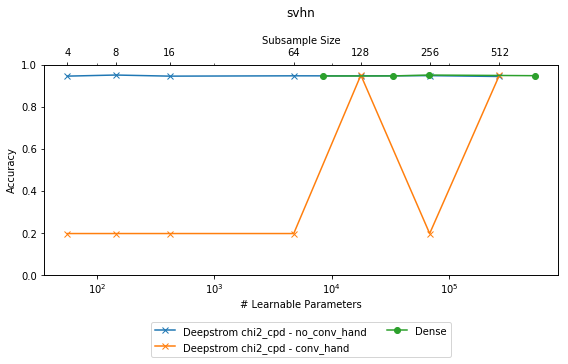

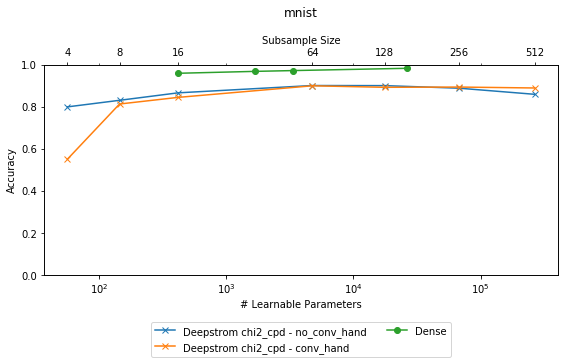

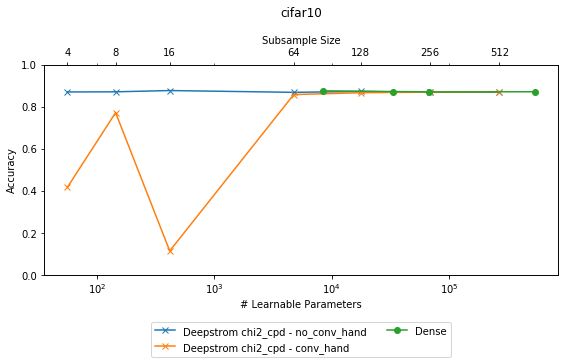

In [42]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
kernel_names.remove("None")
repr_dim = set(df["--out-dim"].values)
repr_dim.remove("None")  # dtype: str
nys_size = set(df["--nys-size"].values)
nys_size.remove("None")
datasets = set(df["dataset"])
subs_everies = set(df["--subs-every"].values)

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))
logger.debug("Tested representation dimension are: {}".format(repr_dim))
logger.debug(f"Tested sub every: {subs_everies}")

for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        for sub_every in subs_everies:
            df_sub_every = df_kernel[df_kernel["--subs-every"] == sub_every]
            accuracies_kernel = df_sub_every["test_acc"]
            subsample_sizes_kernel = df_sub_every["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name} - {conv_status[int(sub_every)]}")
    
    df_dense = df_data[df_data["network"] == "dense"]
    accuracies_dense = df_dense["test_acc"]
    out_dim_dense = df_dense["--out-dim"].astype(int)
    np_param_dense = (nb_feature_conv * out_dim_dense +  # d x D
                out_dim_dense * nb_classes_dataset)  # D x c
    sorted_idx_dense = np.argsort(np_param_dense.values)
    xx = np_param_dense.values[sorted_idx_dense]
    yy = accuracies_dense.values[sorted_idx_dense].astype(float)
    ax.plot(xx, yy, marker="o", label=f"Dense")
    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)